## A Model to Predict if a Customer will stop doing business with the company or nah

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Reading The Data

In [3]:
df = pd.read_csv('Churn Dataset.csv')
df_2 = pd.read_csv('Churn Dataset.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


C:\Users\HP\AppData\Local\Temp\ipykernel_25452\2584639020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Churn', data = df, palette = 'Set2')


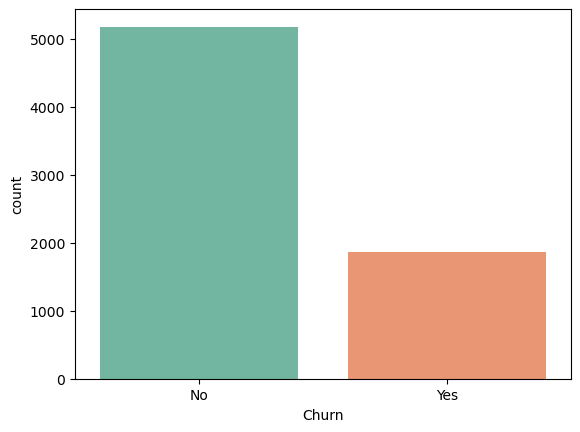

In [8]:
sns.countplot(x = 'Churn', data = df, palette = 'Set2')
plt.show()

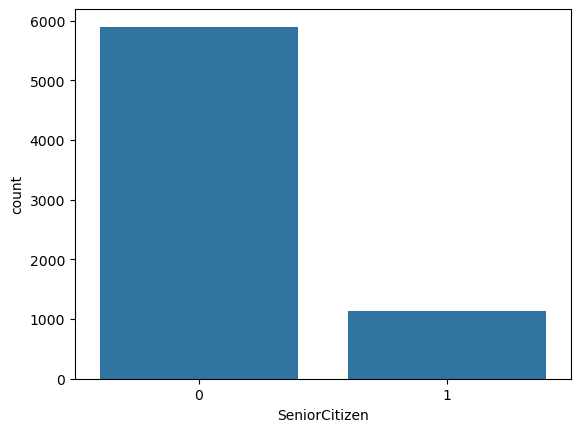

In [9]:
sns.countplot(x = 'SeniorCitizen', data = df)
plt.show()

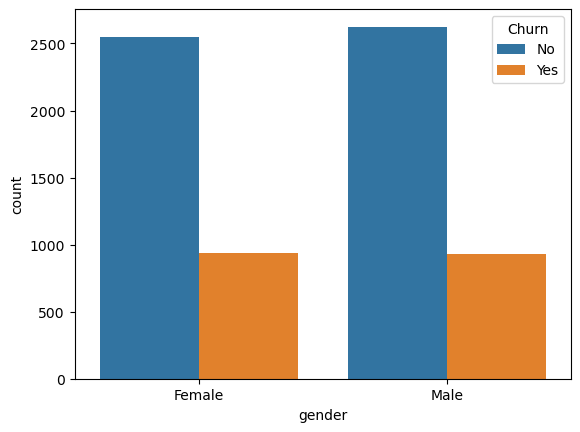

In [10]:
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.show()

In [11]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [12]:
df['customerID'].value_counts()

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

In [13]:
df['Churn Label'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace (' ',np.nan).astype(float)

In [15]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [16]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [17]:
df.corr(numeric_only = True)['Churn Label'].transpose().sort_values(ascending = True)

tenure           -0.352229
TotalCharges     -0.199484
SeniorCitizen     0.150889
MonthlyCharges    0.193356
Churn Label       1.000000
Name: Churn Label, dtype: float64

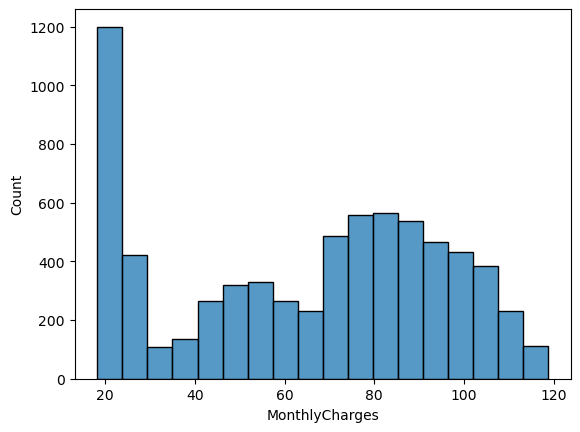

In [18]:
sns.histplot(x = 'MonthlyCharges', data = df)
plt.show()

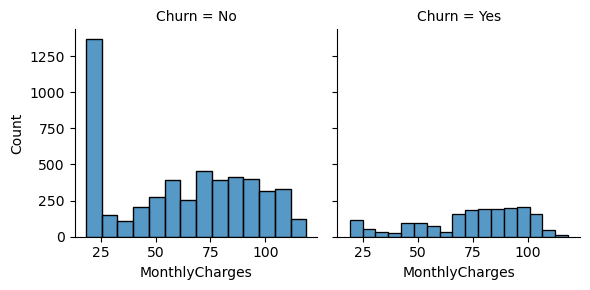

In [19]:
g = sns.FacetGrid(df, col = 'Churn')
g.map_dataframe(sns.histplot, x="MonthlyCharges")
plt.show()

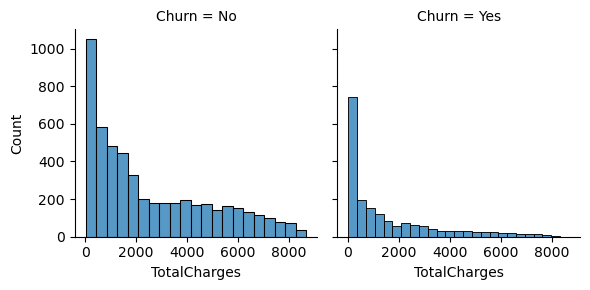

In [20]:
g = sns.FacetGrid(df, col = 'Churn')
g.map_dataframe(sns.histplot, x="TotalCharges")
plt.show()

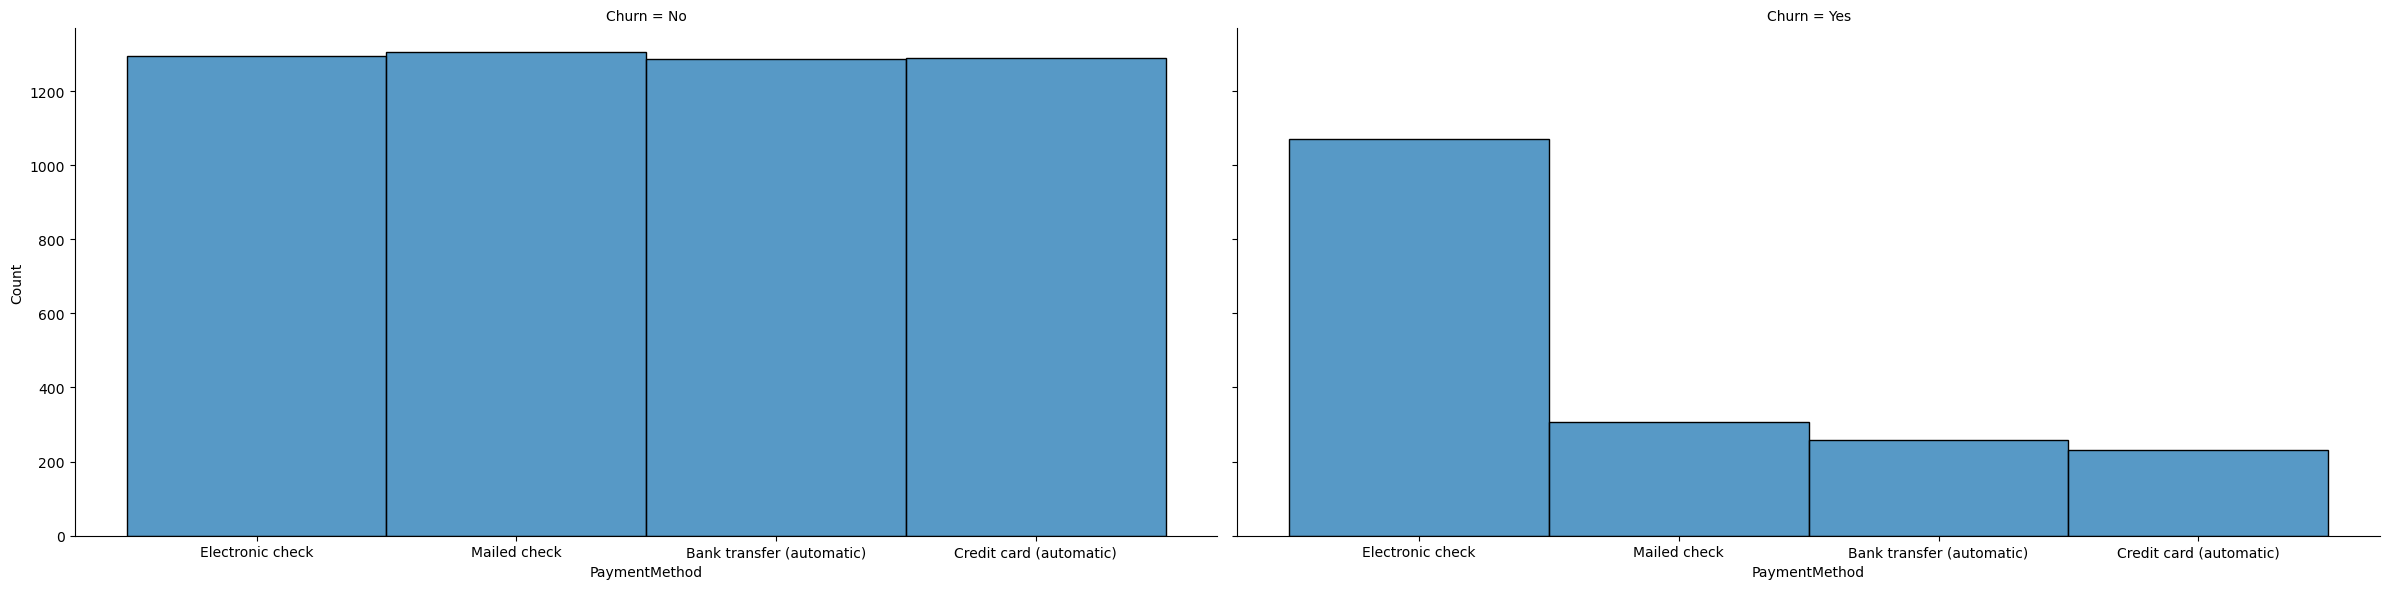

In [21]:
g = sns.FacetGrid(df, col = 'Churn', height = 6, aspect = 2)
g.map_dataframe(sns.histplot, x="PaymentMethod")
plt.tight_layout()
plt.show()

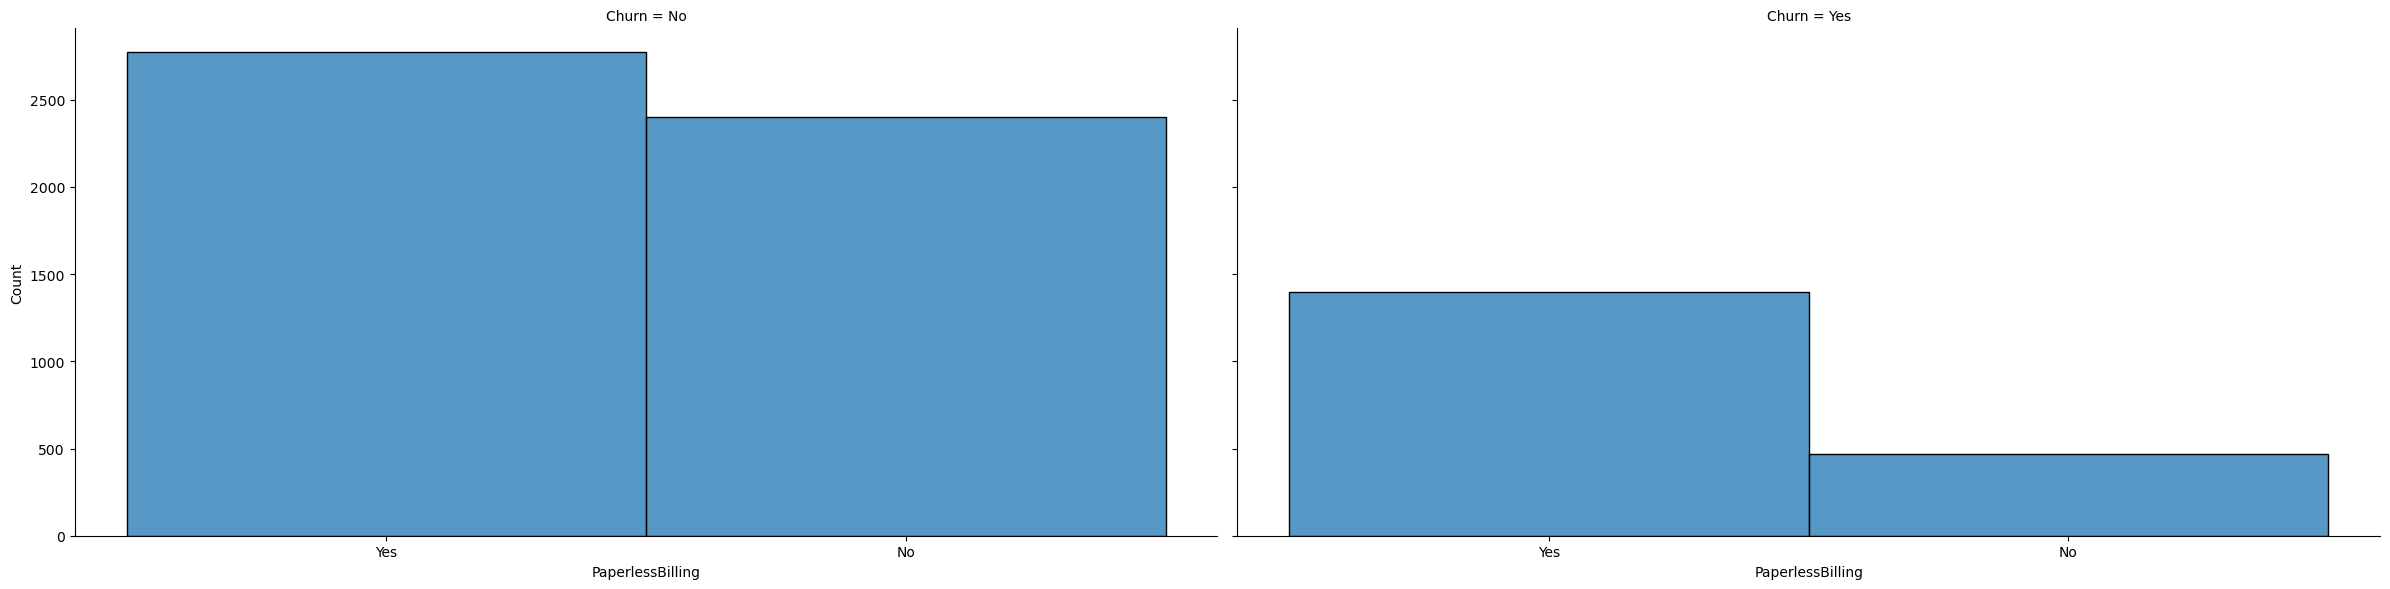

In [22]:
g = sns.FacetGrid(df, col = 'Churn', height = 6, aspect = 2)
g.map_dataframe(sns.histplot, x="PaperlessBilling")
plt.tight_layout()
plt.show()

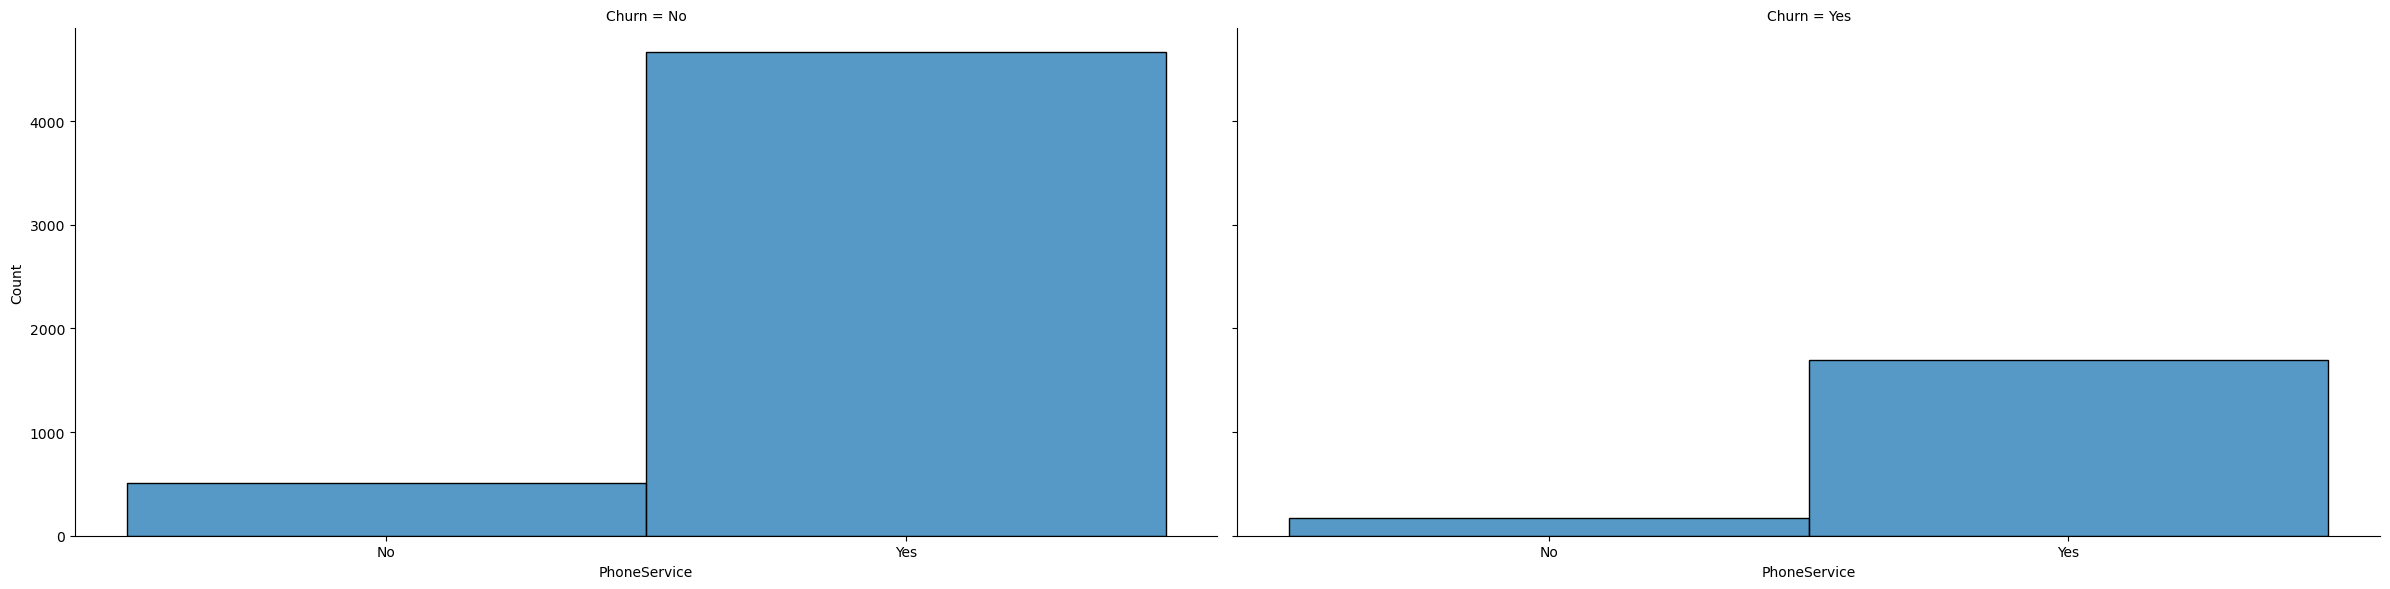

In [23]:
g = sns.FacetGrid(df, col = 'Churn', height = 6, aspect = 2)
g.map_dataframe(sns.histplot, x="PhoneService")
plt.tight_layout()
plt.show()

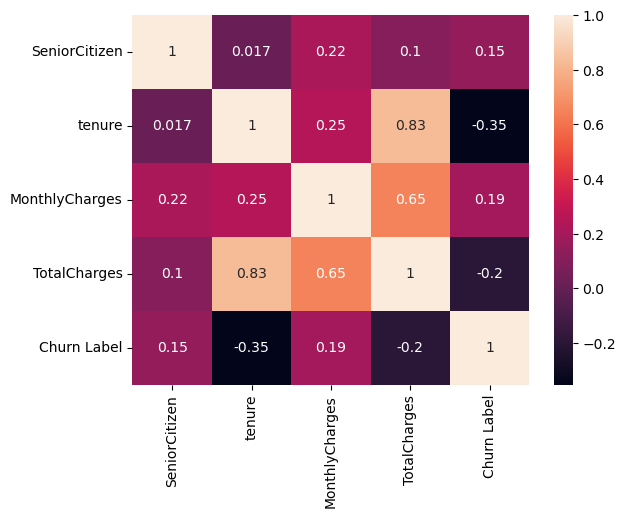

In [24]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

#### Feature Engineering

In [25]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0


In [26]:
df.select_dtypes(['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [27]:
df = df.drop('customerID', axis = 1)

In [28]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [29]:
gender = pd.get_dummies(df['gender'],drop_first = True)

In [30]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [31]:
partner = pd.get_dummies(df['Partner'],drop_first = True)

In [32]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [33]:
dependents = pd.get_dummies(df['Dependents'],drop_first = True)

In [34]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [35]:
phone = pd.get_dummies(df['PhoneService'], drop_first = True)

In [36]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [37]:
Line = pd.get_dummies(df['MultipleLines'], drop_first = True)

In [38]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [39]:
internet = pd.get_dummies(df['InternetService'], drop_first = True)

In [40]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [41]:
Security = pd.get_dummies(df['OnlineSecurity'], drop_first = True)

In [42]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [43]:
backup = pd.get_dummies(df['OnlineBackup'], drop_first = True)

In [44]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [45]:
protection = pd.get_dummies(df['DeviceProtection'], drop_first = True)

In [46]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [47]:
support = pd.get_dummies(df['TechSupport'], drop_first = True)

In [48]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [49]:
tv = pd.get_dummies(df['StreamingTV'], drop_first = True)

In [50]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [51]:
movie = pd.get_dummies(df['StreamingMovies'], drop_first = True)

In [52]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [53]:
contract = pd.get_dummies(df['Contract'], drop_first = True)

In [54]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [55]:
billing = pd.get_dummies(df['PaperlessBilling'], drop_first = True)

In [56]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [57]:
method = pd.get_dummies(df['PaymentMethod'], drop_first = True)

In [58]:
df.select_dtypes(['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [59]:
df = pd.concat([df, gender, partner, dependents, phone, Line, internet,
                Security, backup, protection, support, tv, movie, contract, billing, method], axis=1)

df = df.drop([
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
], axis=1)


In [60]:
df = df.dropna()
df.isnull().sum()

SeniorCitizen              0
tenure                     0
MonthlyCharges             0
TotalCharges               0
Churn Label                0
Male                       0
Yes                        0
Yes                        0
Yes                        0
No phone service           0
Yes                        0
Fiber optic                0
No                         0
No internet service        0
Yes                        0
No internet service        0
Yes                        0
No internet service        0
Yes                        0
No internet service        0
Yes                        0
No internet service        0
Yes                        0
No internet service        0
Yes                        0
One year                   0
Two year                   0
Yes                        0
Credit card (automatic)    0
Electronic check           0
Mailed check               0
dtype: int64

In [61]:
X = df.drop('Churn Label', axis = 1).values
y = df['Churn Label'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

### SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
sm = SMOTE(random_state = 45)

X_train,y_train = sm.fit_resample(X_train,y_train)

In [66]:
X_train.shape

(8284, 30)

### Feature Scaling 

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

### Training the Deep Learning Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(7, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [73]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 50)

In [74]:
model.fit(x = X_train, y = y_train, epochs = 600,
          validation_data = (X_test,y_test), callbacks = [early_stop]
         )

Epoch 1/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6864 - val_loss: 0.6344
Epoch 2/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6478 - val_loss: 0.6002
Epoch 3/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6245 - val_loss: 0.5396
Epoch 4/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6044 - val_loss: 0.5217
Epoch 5/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6032 - val_loss: 0.5120
Epoch 6/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5901 - val_loss: 0.4848
Epoch 7/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5849 - val_loss: 0.4949
Epoch 8/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5785 - val_loss: 0.4934
Epoch 9/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5648 - val_loss: 0.5038
Epoch 10/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5688 - val_loss: 0.4920
Epoch 11/600
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5653 - val_loss: 0.4931
Epoch 12/600
259/259 ━━━━━━━━━━━━━━━━━━━━

In [75]:
loss = pd.DataFrame(model.history.history)

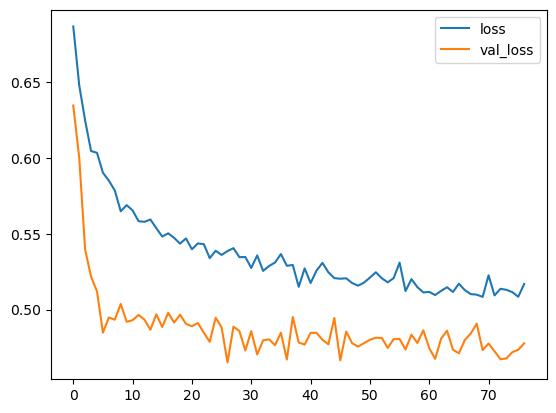

In [76]:
loss.plot()
plt.show()

In [77]:
y_prob = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [78]:
predictions = np.argmax(y_prob,axis = -1)
predictions = (y_prob > 0.5).astype('int32').ravel()

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1021
           1       0.54      0.69      0.61       386

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.78      0.76      0.76      1407



In [81]:
confusion_matrix(y_test,predictions)

array([[797, 224],
       [118, 268]])